# IT350 DA Assignment 5 
## MNIST Dataset
##### Submitted by: Harsh Agarwal (181IT117)

In [1]:
# Import Libraries
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(2017)

In [2]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
#Flatten image
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
#Normalize pixel data
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [4]:
# convert class vectors to binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [5]:
batch_size = 128
epochs = 20

In [6]:
#Initialise model
model = Sequential()
#Add input and 1st hidden layer
model.add(Dense(512, activation='sigmoid', input_shape=(784,)))
#Add 2nd hidden layer
model.add(Dense(512, activation='sigmoid'))
#Add output layer
model.add(Dense(num_classes, activation='sigmoid'))

In [7]:
#Print model information
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [8]:
#Compiling model: Using categorical crossentropy loss function and sgd optimiser
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.SGD(lr=0.1, momentum=0.0, nesterov=False),
              metrics=['accuracy'])


In [9]:
#Training model
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
#Evaluating model
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/20
469/469 [==============================] - 5s 5ms/step - loss: 2.0702 - accuracy: 0.2696 - val_loss: 0.8628 - val_accuracy: 0.7363
Epoch 2/20
469/469 [==============================] - 2s 4ms/step - loss: 0.6864 - accuracy: 0.8133 - val_loss: 0.4591 - val_accuracy: 0.8733
Epoch 3/20
469/469 [==============================] - 2s 4ms/step - loss: 0.4458 - accuracy: 0.8734 - val_loss: 0.3792 - val_accuracy: 0.8905
Epoch 4/20
469/469 [==============================] - 2s 4ms/step - loss: 0.3847 - accuracy: 0.8892 - val_loss: 0.3415 - val_accuracy: 0.9010
Epoch 5/20
469/469 [==============================] - 2s 4ms/step - loss: 0.3508 - accuracy: 0.8978 - val_loss: 0.3167 - val_accuracy: 0.9060
Epoch 6/20
469/469 [==============================] - 2s 4ms/step - loss: 0.3288 - accuracy: 0.9035 - val_loss: 0.3075 - val_accuracy: 0.9105
Epoch 7/20
469/469 [==============================] - 2s 4ms/step - loss: 0.3124 - accuracy: 0.9080 - val_loss: 0.2991 - val_accuracy: 0.9143
Epoch 

In [10]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
None


In [11]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2271760255098343
Test accuracy: 0.9348999857902527


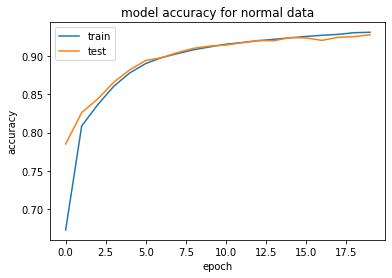

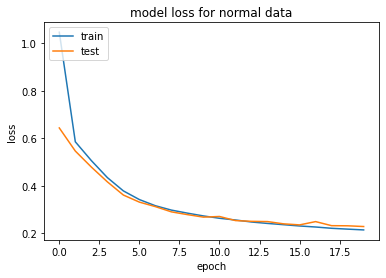

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy for normal data')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss for normal data')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Dimensionality Reduction using PCA

In [12]:
x_train, y_train, x_valid, y_valid, x_test ,y_test = [], [], [], [], [], []
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000,28,28)
x_test = x_test.reshape(10000,28,28)

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2)

x_train = x_train.astype('float32')
x_valid = x_valid.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_valid /= 255
x_test /= 255

x_train = x_train.reshape(len(x_train),28,28)
x_test = x_test.reshape(10000,28,28)
y_train = keras.utils.to_categorical(y_train, 10)
y_valid = keras.utils.to_categorical(y_valid, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [14]:
pca = PCA(n_components=10)
X_train = x_train.reshape(48000,784)
x_train_reduced = pca.fit_transform(X_train)
print("Explained variance = ",(100*(np.sum(pca.explained_variance_ratio_))))
print("The number of features are reduced to ",pca.n_components_)

Explained variance =  48.81797134876251
The number of features are reduced to  10


In [15]:
X_test = x_test.reshape(10000,784)
x_test_reduced = pca.transform(X_test)
X_valid = x_valid.reshape(12000,784)
x_valid_reduced = pca.transform(X_valid)

In [16]:

optim = keras.optimizers.SGD(lr=0.1)

In [17]:
PCAmodel = Sequential()
PCAmodel.add(Dense(256, activation='sigmoid',kernel_initializer = 'he_normal'))
#PCAmodel.add(Dropout(0.4))
PCAmodel.add(Dense(128, activation='sigmoid'))
#PCAmodel.add(Dropout(0.4))
PCAmodel.add(Dense(100, activation='sigmoid'))
#PCAmodel.add(Dropout(0.4))
PCAmodel.add(Dense(10, activation='sigmoid'))
optim = keras.optimizers.SGD(lr=0.1)

In [18]:
PCAmodel.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.SGD(lr=0.1, momentum=0.0, nesterov=False),
              metrics=['accuracy'])

In [19]:
history = PCAmodel.fit(x_train_reduced, y_train,batch_size=32,epochs=20,verbose=2,validation_data=(x_valid_reduced,y_valid))

Epoch 1/20
1500/1500 - 4s - loss: 1.0462 - accuracy: 0.6733 - val_loss: 0.6432 - val_accuracy: 0.7853
Epoch 2/20
1500/1500 - 3s - loss: 0.5849 - accuracy: 0.8087 - val_loss: 0.5459 - val_accuracy: 0.8261
Epoch 3/20
1500/1500 - 3s - loss: 0.5058 - accuracy: 0.8363 - val_loss: 0.4786 - val_accuracy: 0.8438
Epoch 4/20
1500/1500 - 3s - loss: 0.4342 - accuracy: 0.8603 - val_loss: 0.4162 - val_accuracy: 0.8657
Epoch 5/20
1500/1500 - 3s - loss: 0.3781 - accuracy: 0.8778 - val_loss: 0.3606 - val_accuracy: 0.8817
Epoch 6/20
1500/1500 - 3s - loss: 0.3415 - accuracy: 0.8900 - val_loss: 0.3308 - val_accuracy: 0.8940
Epoch 7/20
1500/1500 - 3s - loss: 0.3156 - accuracy: 0.8978 - val_loss: 0.3118 - val_accuracy: 0.8977
Epoch 8/20
1500/1500 - 3s - loss: 0.2972 - accuracy: 0.9030 - val_loss: 0.2898 - val_accuracy: 0.9044
Epoch 9/20
1500/1500 - 3s - loss: 0.2844 - accuracy: 0.9080 - val_loss: 0.2781 - val_accuracy: 0.9099
Epoch 10/20
1500/1500 - 3s - loss: 0.2726 - accuracy: 0.9116 - val_loss: 0.2676 - 

In [20]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
None


In [21]:
score = PCAmodel.evaluate(x_test_reduced, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.22815966606140137
Test accuracy: 0.9283000230789185


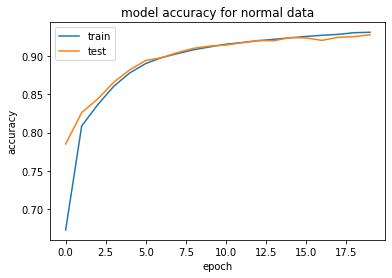

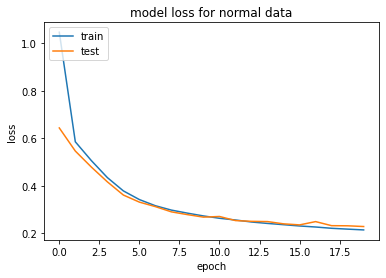

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy for normal data')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss for normal data')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()